In [1]:
# 25 May 2023, Luca, Stefano # Unimib

# We compare the weather station data (installed on the U4 roof), over a 3 h time span.
# The weather station saves data every minute (the wind is an averaged variable, the others should not...)
# More info on the weather station can be found here 
# https://www.davisinstruments.com/products/wireless-vantage-pro2-plus-including-uv-solar-radiation-sensors?variant=39619859939489
# The time in the weather station data is local time (UTC+2), whereas it is UTC in the sparvio sensor.

# With respect to the previous comparison, the temperautre and humidity sensor was shaded with a rigid plastic
# shield for weather stations.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
###<img src="./WhatsApp Image 2022-07-20 at 14.22.21.jpeg" width=400/>

In [10]:
# Read the weather station data.
filename = '25Maggio1 minuto_2_header.csv'
df = pd.read_csv(filename)#,sep='\t')

temp = df['TempOut']
time = df['Time']
outhum = df['OutHum']
wspeed = df['WindSpeed']

df

,Date,Time,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,25/05/23,10:25,20.2,20.2,20.1,68,14.1,2.2,ESE,0.13,...,58,13.0,21.3,10.71,1.1711,0.0,20,1,87.0,1
1,25/05/23,10:26,20.2,20.2,20.2,68,14.1,1.3,SE,0.08,...,58,13.1,21.4,10.71,1.1709,0.0,23,1,100.0,1
2,25/05/23,10:27,20.3,20.3,20.2,68,14.2,1.8,SE,0.11,...,58,13.1,21.5,10.70,1.1706,0.0,23,1,100.0,1
3,25/05/23,10:28,20.3,20.3,20.2,68,14.2,0.9,SE,0.05,...,58,13.2,21.6,10.70,1.1703,0.0,24,1,100.0,1
4,25/05/23,10:29,20.2,20.3,20.2,68,14.1,0.9,WSW,0.05,...,58,13.2,21.6,10.70,1.1703,0.0,23,1,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,25/05/23,13:05,22.5,22.5,22.4,61,14.6,1.3,E,0.08,...,55,13.3,22.8,10.09,1.1673,0.0,23,1,100.0,1
161,25/05/23,13:06,22.6,22.6,22.5,61,14.7,3.6,ESE,0.21,...,55,13.4,22.8,10.09,1.1670,0.0,23,1,100.0,1
162,25/05/23,13:07,22.7,22.7,22.6,60,14.5,1.8,ESE,0.11,...,55,13.4,22.8,10.09,1.1670,0.0,24,1,100.0,1
163,25/05/23,13:08,22.7,22.7,22.6,59,14.3,3.1,SE,0.19,...,55,13.4,22.8,10.09,1.1671,0.0,23,1,100.0,1


In [11]:
# Generate an array of UTC time for the weather station time range.
time_utc = np.datetime64('2022-07-20T08:25') + np.arange(0,165,np.timedelta64(1,'m'))

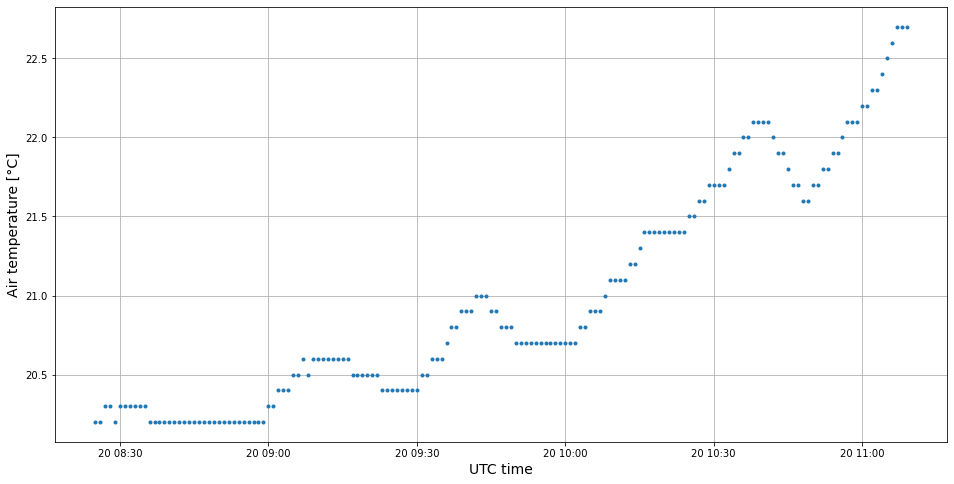

In [12]:
plt.figure(figsize=(16,8))
plt.plot(time_utc,temp,'.')
plt.xlabel('UTC time',fontsize=14)
plt.ylabel('Air temperature [°C]',fontsize=14)
plt.grid()

In [4]:
# Read the sparvio sensor output.

filename = '20230525_080908.csv'
df_s = pd.read_csv(filename,sep=';',skiprows=9)

# Define the UTC time axis
time_s = df_s['Time (UTC)']
time_utc_s = np.zeros((len(time_s),),dtype='datetime64[ms]')
for tt,instant in enumerate(np.array(time_s)):
    str_instant = '2022-07-20T'+instant
    time_utc_s[tt] = np.datetime64(str_instant)

wspeed_s = df_s[' C.wspd']
wspeed_s_sm = df_s[' C.wspd'].rolling(300, min_periods=1, center=True).mean()

temp_tri = df_s[' C.temp']
temp_tri_sm = df_s[' C.temp'].rolling(300, min_periods=1, center=True).mean()
rh_tri = df_s[' C.rh']
rh_tri_sm = df_s[' C.rh'].rolling(300, min_periods=1, center=True).mean()

df_s

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh,C.wspd,C.wdir,C.windU,C.windV,C.windW,C.temp,C.rh,C.pr,C.pitch,C.roll,C.heading,SKH1_70727633.lat,SKH1_70727633.lon,SKH1_70727633.alt
0,08:09:08.222,99983,8.147,22.45,56.57,0.67,76,-0.65,-0.16,0.10,20.78,75.3,100167,0.4,-4.4,0,NaN,NaN,NaN
1,08:09:08.346,,,,,0.78,71,-0.72,-0.25,0.18,20.00,79.3,100167,0.4,-4.5,0,NaN,NaN,NaN
2,08:09:08.541,,,,,0.70,99,-0.68,0.11,0.11,20.10,78.7,100167,0.4,-4.5,0,NaN,NaN,NaN
3,08:09:08.741,,,,,0.81,85,-0.80,-0.07,-0.02,20.07,78.9,100166,0.4,-4.5,0,NaN,NaN,NaN
4,08:09:08.941,99985,8.192,22.48,56.74,0.72,103,-0.70,0.16,-0.03,19.97,79.4,100166,0.4,-4.5,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52533,11:04:15.372,100063,7.616,26.02,48.32,1.76,219,1.11,1.36,-0.08,19.47,85.6,100186,-16.8,-12.1,0,45.514211,9.2115,158.9
52534,11:04:15.578,,,,,1.64,235,1.35,0.93,-0.01,19.51,85.4,100186,-13.8,-12.3,0,NaN,NaN,NaN
52535,11:04:15.774,,,,,1.59,251,1.50,0.52,-0.01,19.67,84.5,100186,-12.4,-10.7,0,NaN,NaN,NaN
52536,11:04:15.972,,,,,1.22,243,1.06,0.54,-0.24,19.63,84.6,100186,-11.1,-11.5,0,NaN,NaN,NaN


In [5]:
# Determine the width of the rolling window corresponding to a minute
dt = (time_utc_s[-1]-time_utc_s[0])/len(time_utc_s)
print(dt)
60e3/199

200 milliseconds


301.5075376884422

In [6]:
df_skh1 = pd.read_csv(filename,sep=';',skiprows=9,usecols=[0,1,2,3,4],na_values=' ')#skip_blank_lines=True)
temp_skh1 = df_skh1[' SKH1_70727633.temp']
rh_skh1 = df_skh1[' SKH1_70727633.rh']
temp_skh1_sm = temp_skh1.rolling(300, min_periods=1, center=True).mean(skipna=True)
rh_skh1_sm = rh_skh1.rolling(300, min_periods=1, center=True).mean(skipna=True)
df_skh1

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh
0,08:09:08.222,99983.0,8.147,22.45,56.57
1,08:09:08.346,NaN,NaN,NaN,NaN
2,08:09:08.541,NaN,NaN,NaN,NaN
3,08:09:08.741,NaN,NaN,NaN,NaN
4,08:09:08.941,99985.0,8.192,22.48,56.74
...,...,...,...,...,...
52533,11:04:15.372,100063.0,7.616,26.02,48.32
52534,11:04:15.578,NaN,NaN,NaN,NaN
52535,11:04:15.774,NaN,NaN,NaN,NaN
52536,11:04:15.972,NaN,NaN,NaN,NaN


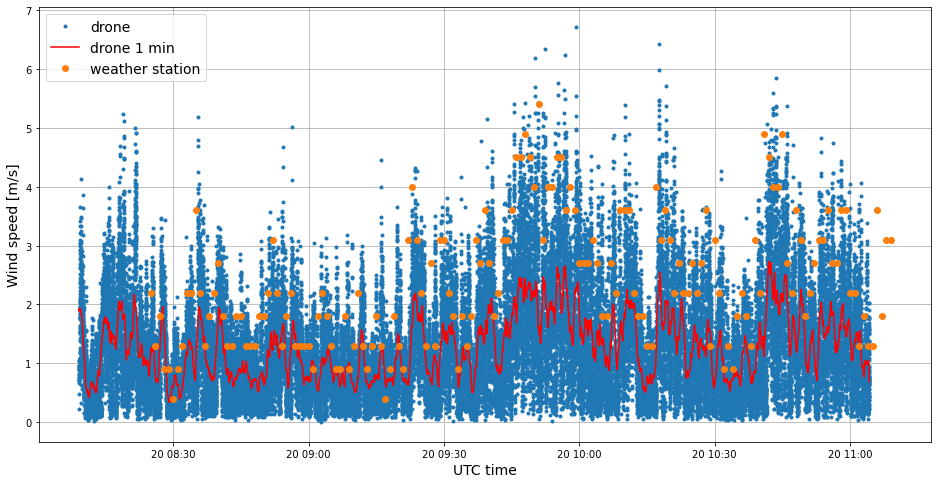

In [13]:
plt.figure(figsize=(16,8))
plt.plot(time_utc_s,wspeed_s,'.')
plt.plot(time_utc_s,wspeed_s_sm,'-r')
plt.plot(time_utc,wspeed,'o')
plt.xlabel('UTC time',fontsize=14)
plt.ylabel('Wind speed [m/s]',fontsize=14)
plt.grid()
plt.legend(['drone','drone 1 min','weather station'],fontsize=14)

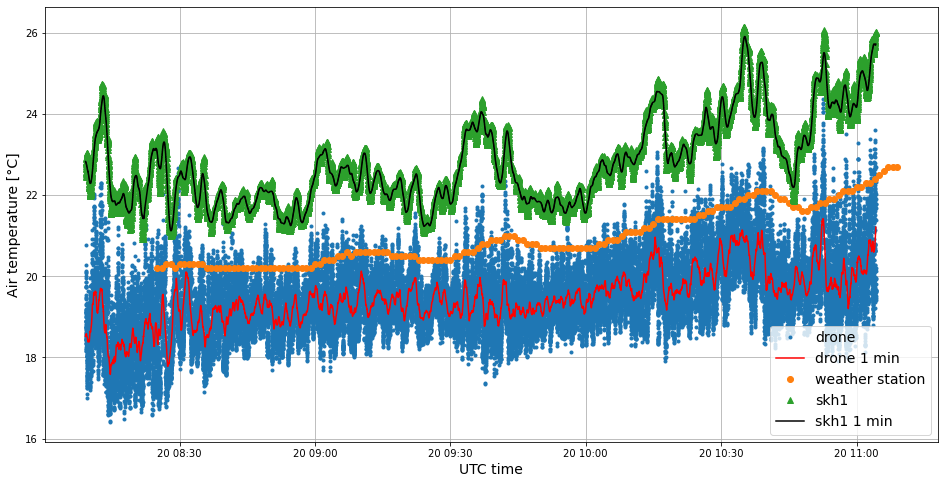

In [15]:
plt.figure(figsize=(16,8))
plt.plot(time_utc_s,temp_tri,'.')
plt.plot(time_utc_s,temp_tri_sm,'-r')
plt.plot(time_utc,temp,'o')
plt.plot(time_utc_s,temp_skh1,'^')
plt.plot(time_utc_s,temp_skh1_sm,'-k')
plt.xlabel('UTC time',fontsize=14)
plt.ylabel('Air temperature [°C]',fontsize=14)plt.figure(figsize=(16,8))
plt.plot(time_utc,temp,'.')
plt.xlabel('UTC time',fontsize=14)
plt.ylabel('Air temperature [°C]',fontsize=14)
plt.grid()
plt.grid()
plt.legend(['drone','drone 1 min','weather station','skh1','skh1 1 min'],fontsize=14)

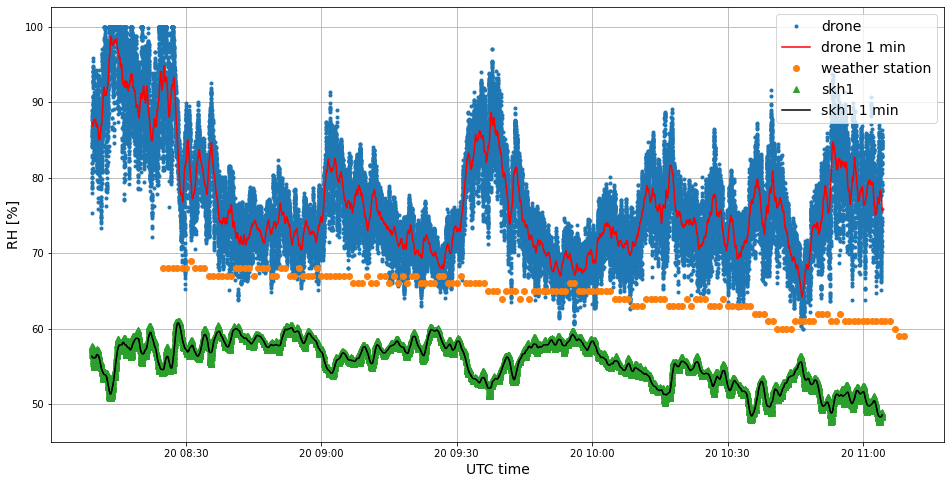

In [14]:
plt.figure(figsize=(16,8))
plt.plot(time_utc_s,rh_tri,'.')
plt.plot(time_utc_s,rh_tri_sm,'-r')
plt.plot(time_utc,outhum,'o')
plt.plot(time_utc_s,rh_skh1,'^')
plt.plot(time_utc_s,rh_skh1_sm,'-k')
plt.xlabel('UTC time',fontsize=14)
plt.ylabel('RH [%]',fontsize=14)
plt.grid()
plt.legend(['drone','drone 1 min','weather station','skh1','skh1 1 min'],fontsize=14)